In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

In [15]:
df=pd.read_csv('../data/clean_telco.csv')

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Create new features 

In [76]:
tenure_group = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12','13-24','25-48','49-60','61-72'] , include_lowest=True)
df['tenure_group'] = tenure_group

In [80]:
df['avg_monthly_spend'] = df['Total_Charges'] / df['tenure']
df['avg_monthly_spend'] = df['avg_monthly_spend'].replace([np.inf, -np.inf], 0)  
df['avg_monthly_spend'] = df['avg_monthly_spend'].fillna(0)  

In [28]:
df['Num_Services'] = df[['Phone_Service','Internet_Service','Online_Security','Online_Backup',
                         'Device_Protection','Tech_Support','Streaming_TV','Streaming_Movies']].apply(lambda x: sum(x=='Yes'), axis=1)


In [90]:
df['Monthly_to_Total_Ratio'] = df['Monthly_Charges'] / df['Total_Charges']
df['Monthly_to_Total_Ratio'] = df['Monthly_to_Total_Ratio'].replace([np.inf, -np.inf], 0)  
df['Monthly_to_Total_Ratio'] = df['Monthly_to_Total_Ratio'].fillna(0)  

In [29]:
df['Monthly_to_Total_Ratio'] = df['Monthly_Charges'] / df['Total_Charges']


In [30]:
df['Automatic_Payment'] = df['Payment_Method'].isin(['Bank transfer (automatic)', 'Credit card (automatic)']).astype(int)


In [46]:
df['Internet_Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [47]:
df['No_Internet'] = (df['Internet_Service']=='No').astype(int)


In [32]:

df['Any_Streaming'] = ((df['Streaming_TV'] == 'Yes') | (df['Streaming_Movies'] == 'Yes')).astype(int)


In [34]:
def family_type(row):
    if row['Is_Married'] == 'No' and row['Dependents'] == 'No':
        return 'Single'
    elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'No':
        return 'Married_No_Children'
    elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'Yes':
        return 'Married_With_Children'
    elif row['Is_Married'] == 'No' and row['Dependents'] == 'Yes':
        return 'Single_With_Children'  # optional, if this case exists
    else:
        return 'Unknown'  # safety fallback


df['Family_Type'] = df.apply(family_type, axis=1)


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   object  
 2   Senior_Citizen          7043 non-null   int64   
 3   Is_Married              7043 non-null   object  
 4   Dependents              7043 non-null   object  
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   object  
 7   Dual                    7043 non-null   object  
 8   Internet_Service        7043 non-null   object  
 9   Online_Security         7043 non-null   object  
 10  Online_Backup           7043 non-null   object  
 11  Device_Protection       7043 non-null   object  
 12  Tech_Support            7043 non-null   object  
 13  Streaming_TV            7043 non-null   object  
 14  Streaming_Movies        

In [39]:
# Display unique values for object columns to identify categorical features
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nFeature: {col}")
    print(f"Unique Values: {df[col].unique()}")


Feature: customerID
Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

Feature: gender
Unique Values: ['Female' 'Male']

Feature: Is_Married
Unique Values: ['Yes' 'No']

Feature: Dependents
Unique Values: ['No' 'Yes']

Feature: Phone_Service
Unique Values: ['No' 'Yes']

Feature: Dual
Unique Values: ['No phone service' 'No' 'Yes']

Feature: Internet_Service
Unique Values: ['DSL' 'Fiber optic' 'No']

Feature: Online_Security
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Online_Backup
Unique Values: ['Yes' 'No' 'No internet service']

Feature: Device_Protection
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Tech_Support
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Streaming_TV
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Streaming_Movies
Unique Values: ['No' 'Yes' 'No internet service']

Feature: Contract
Unique Values: ['Month-to-month' 'One year' 'Two year']

Feature: Paperless_Bi

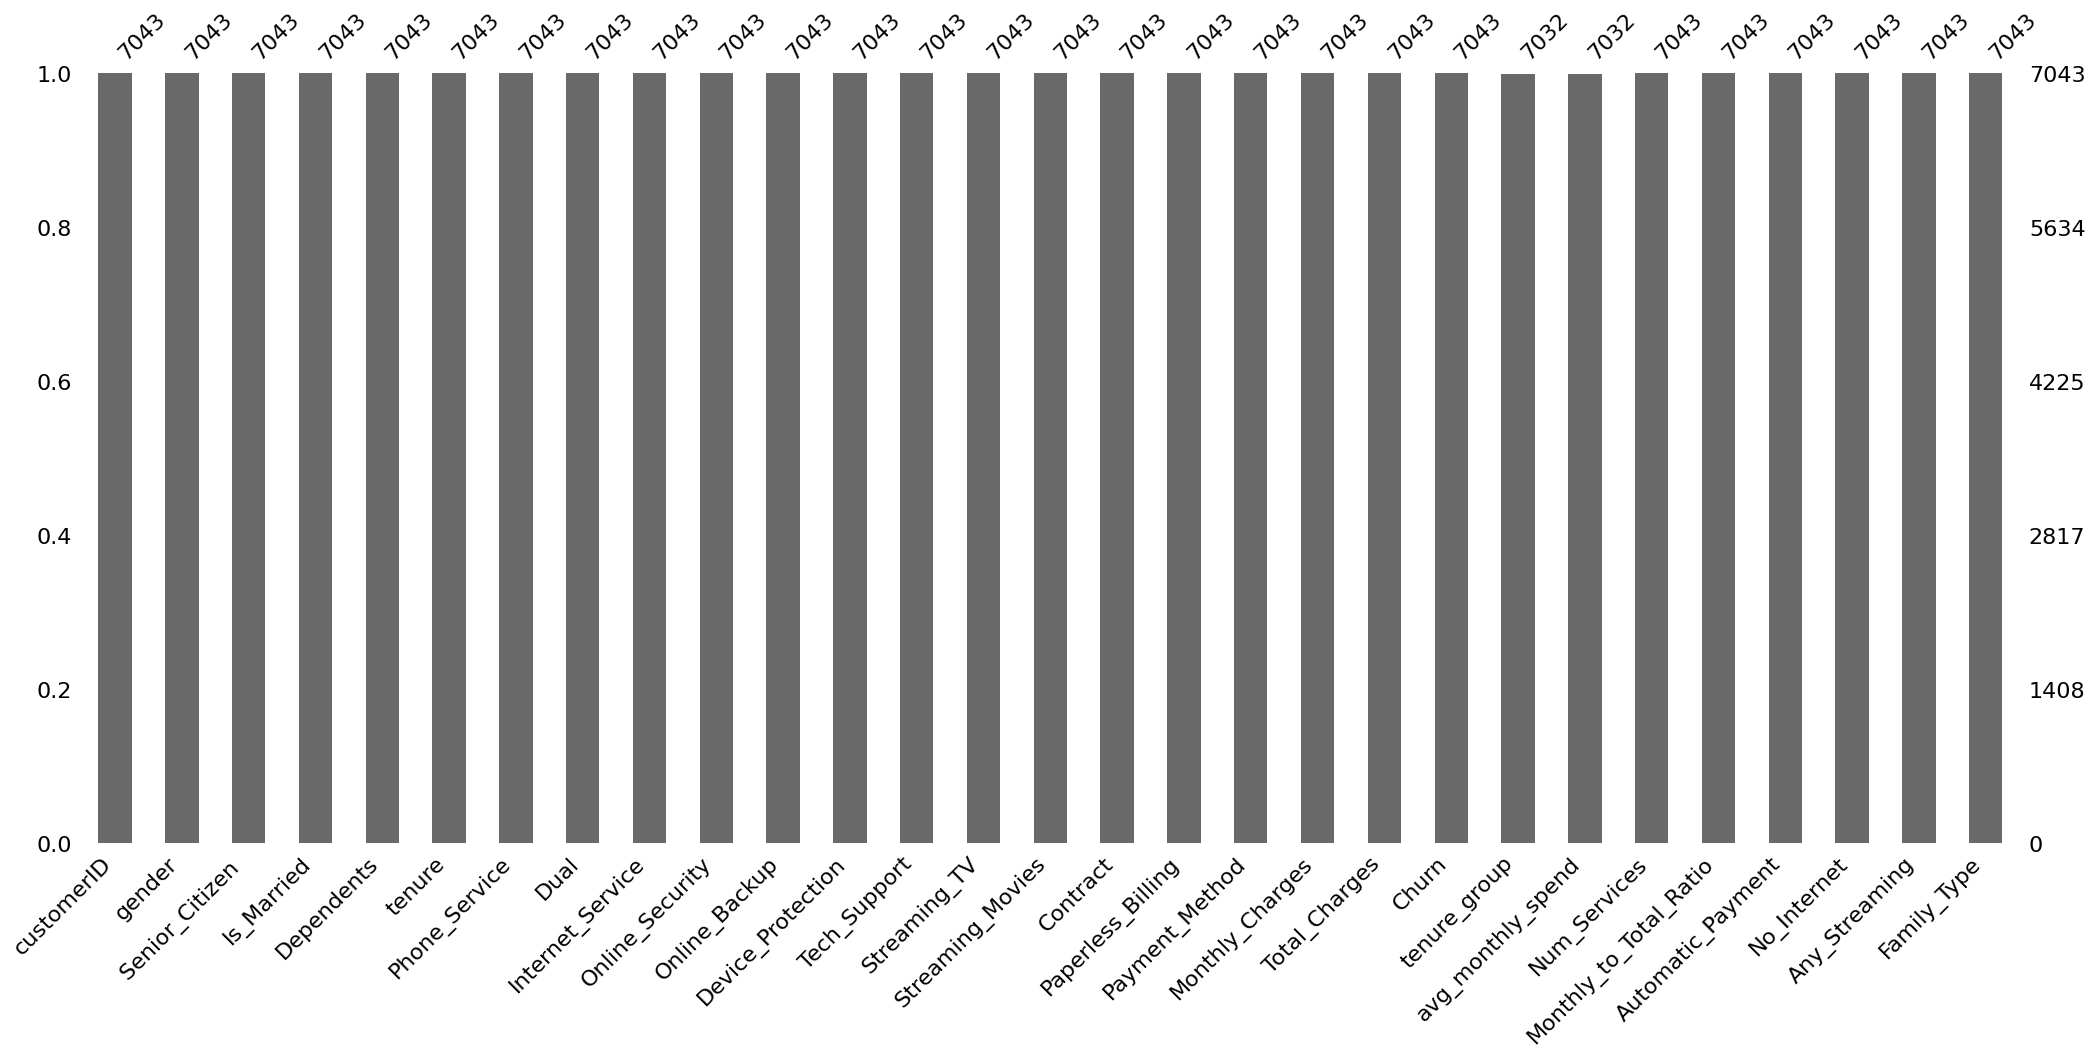

In [38]:
msno.bar(df)
plt.show()

In [40]:
df['Senior_Citizen '].unique()

array([0, 1])

In [42]:
df['Any_Streaming'].unique()

array([0, 1])

In [43]:
df['Automatic_Payment'].unique()

array([0, 1])

In [44]:
df['Family_Type'].unique()  

array(['Married_No_Children', 'Single', 'Single_With_Children',
       'Married_With_Children'], dtype=object)

In [48]:
df['No_Internet'].unique()

array([0, 1])

In [52]:

categorical_features = [
    'gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual',
    'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection',
    'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
    'Paperless_Billing', 'Payment_Method', 'Churn', 'Family_Type','Senior_Citizen ','Any_Streaming','Automatic_Payment'
]

df[categorical_features] = df[categorical_features].astype('category')


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   category
 2   Senior_Citizen          7043 non-null   category
 3   Is_Married              7043 non-null   category
 4   Dependents              7043 non-null   category
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   category
 7   Dual                    7043 non-null   category
 8   Internet_Service        7043 non-null   category
 9   Online_Security         7043 non-null   category
 10  Online_Backup           7043 non-null   category
 11  Device_Protection       7043 non-null   category
 12  Tech_Support            7043 non-null   category
 13  Streaming_TV            7043 non-null   category
 14  Streaming_Movies        

In [ ]:
def generate_features(row):
    """
    Generate features for a single row or DataFrame.
    """
    if 'tenure' in row:
        row['tenure_group'] = pd.cut(
            [row['tenure']],
            bins=[0, 12, 24, 48, 60, 72],
            labels=['0-12', '13-24', '25-48', '49-60', '61-72']
        )[0]
    
    if 'Total_Charges' in row and 'tenure' in row and row['tenure'] > 0:
        row['avg_monthly_spend'] = row['Total_Charges'] / row['tenure']
    else:
        row['avg_monthly_spend'] = 0
    
    service_columns = [
        'Phone_Service', 'Internet_Service', 'Online_Security', 'Online_Backup',
        'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies'
    ]
    if all(col in row for col in service_columns):
        row['Num_Services'] = sum(row[col] == 'Yes' for col in service_columns)
    
    if 'Monthly_Charges' in row and 'Total_Charges' in row and row['Total_Charges'] > 0:
        row['Monthly_to_Total_Ratio'] = row['Monthly_Charges'] / row['Total_Charges']
    else:
        row['Monthly_to_Total_Ratio'] = 0
    
    if 'Payment_Method' in row:
        row['Automatic_Payment'] = int(row['Payment_Method'] in ['Bank transfer (automatic)', 'Credit card (automatic)'])
    
    if 'Internet_Service' in row:
        row['No_Internet'] = int(row['Internet_Service'] == 'No')
    
    if 'Streaming_TV' in row and 'Streaming_Movies' in row:
        row['Any_Streaming'] = int(row['Streaming_TV'] == 'Yes' or row['Streaming_Movies'] == 'Yes')
    
    if 'Is_Married' in row and 'Dependents' in row:
        if row['Is_Married'] == 'No' and row['Dependents'] == 'No':
            row['Family_Type'] = 'Single'
        elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'No':
            row['Family_Type'] = 'Married_No_Children'
        elif row['Is_Married'] == 'Yes' and row['Dependents'] == 'Yes':
            row['Family_Type'] = 'Married_With_Children'
        elif row['Is_Married'] == 'No' and row['Dependents'] == 'Yes':
            row['Family_Type'] = 'Single_With_Children'
        else:
            row['Family_Type'] = 'Unknown'
    
    return row

In [91]:

X = df.drop(columns=['Churn','customerID'])
y = df['Churn']

In [92]:
y= le.fit_transform(y)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   category
 2   Senior_Citizen          7043 non-null   category
 3   Is_Married              7043 non-null   category
 4   Dependents              7043 non-null   category
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   category
 7   Dual                    7043 non-null   category
 8   Internet_Service        7043 non-null   category
 9   Online_Security         7043 non-null   category
 10  Online_Backup           7043 non-null   category
 11  Device_Protection       7043 non-null   category
 12  Tech_Support            7043 non-null   category
 13  Streaming_TV            7043 non-null   category
 14  Streaming_Movies        

In [71]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)


<Axes: >

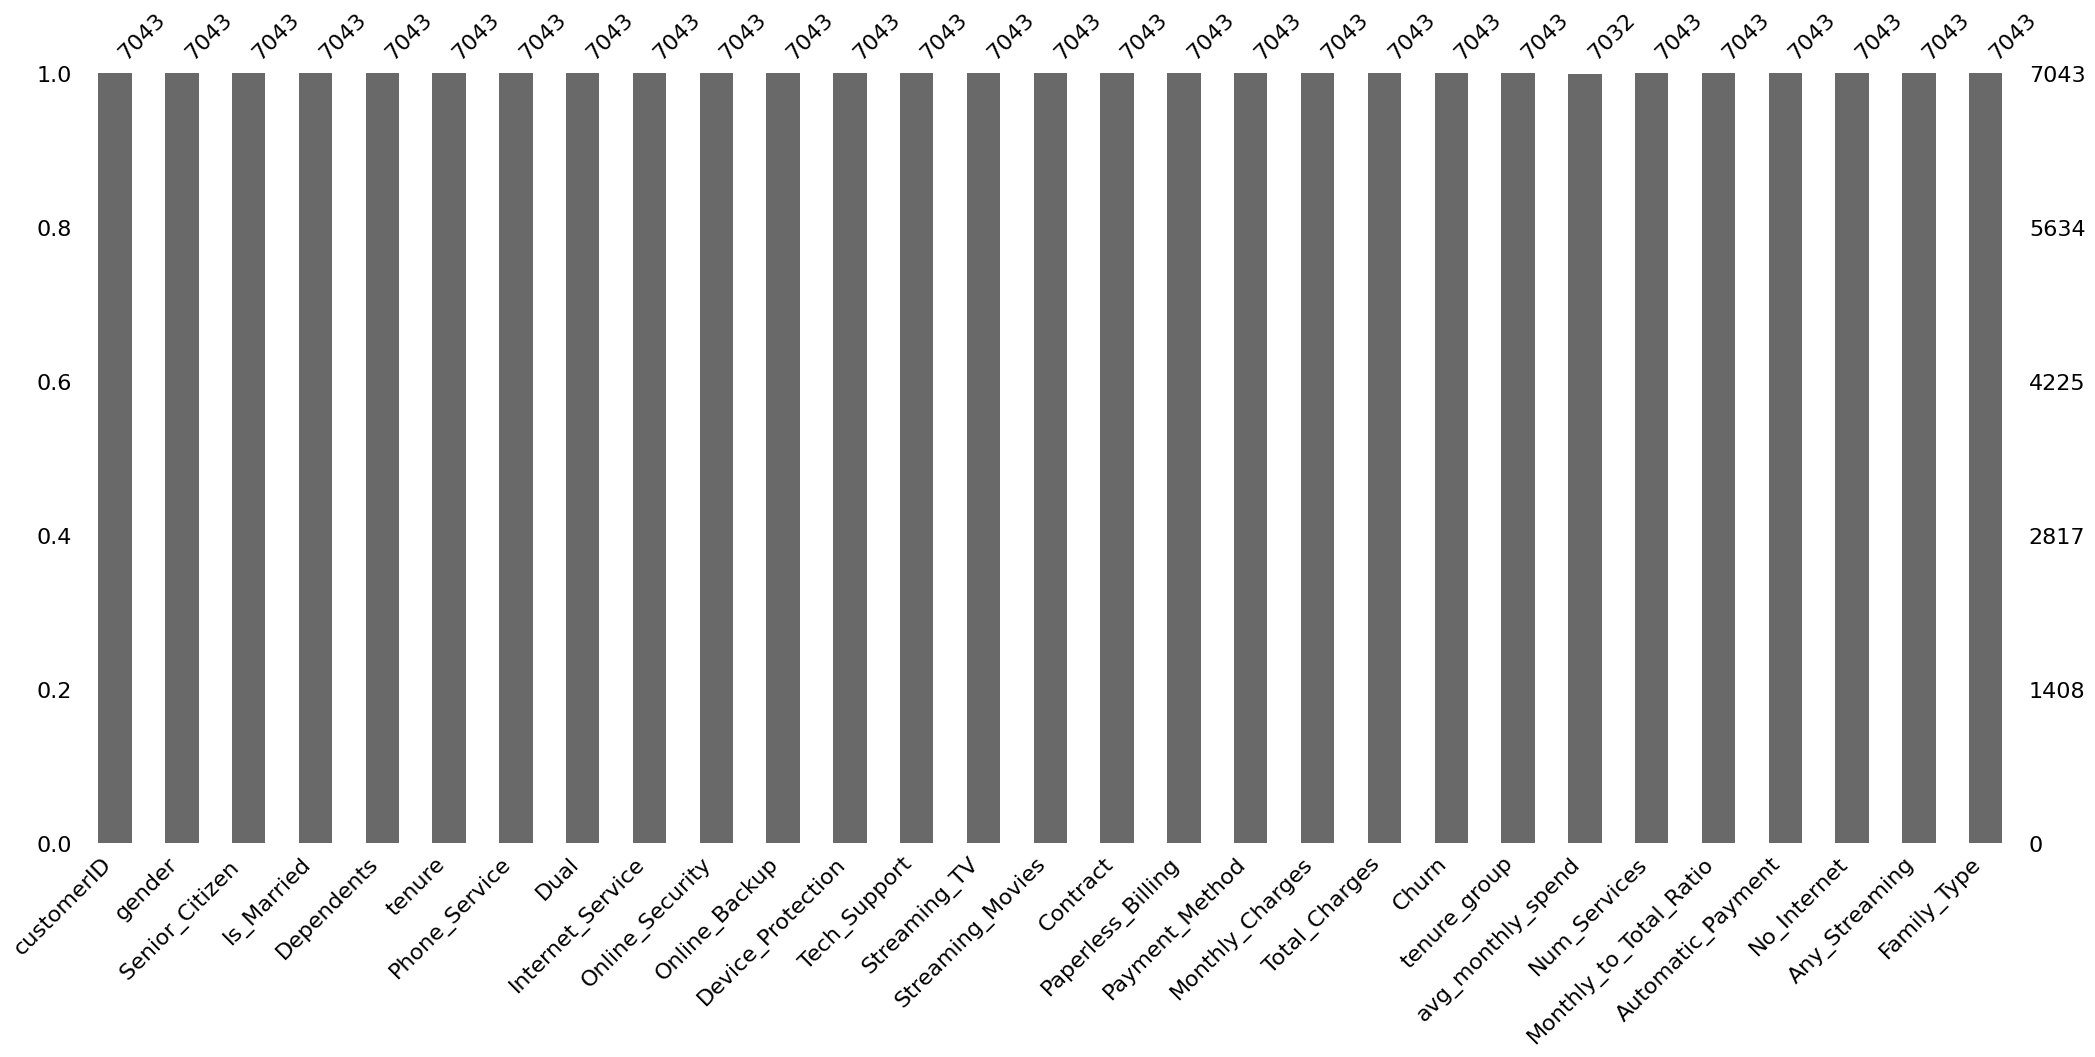

In [77]:
msno.bar(df)

In [81]:
missing_percentages = df.isnull().mean() * 100

print("Percentage of missing values for each feature:")
print(missing_percentages[missing_percentages > 0])  

Percentage of missing values for each feature:
Series([], dtype: float64)


In [75]:

missing_tenure_group = df[df['tenure_group'].isnull()]

print("Tenure values for missing tenure_group:")
print(missing_tenure_group['tenure'])

Tenure values for missing tenure_group:
488     0
753     0
936     0
1082    0
1340    0
3331    0
3826    0
4380    0
5218    0
6670    0
6754    0
Name: tenure, dtype: int64


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   customerID              7043 non-null   object  
 1   gender                  7043 non-null   category
 2   Senior_Citizen          7043 non-null   category
 3   Is_Married              7043 non-null   category
 4   Dependents              7043 non-null   category
 5   tenure                  7043 non-null   int64   
 6   Phone_Service           7043 non-null   category
 7   Dual                    7043 non-null   category
 8   Internet_Service        7043 non-null   category
 9   Online_Security         7043 non-null   category
 10  Online_Backup           7043 non-null   category
 11  Device_Protection       7043 non-null   category
 12  Tech_Support            7043 non-null   category
 13  Streaming_TV            7043 non-null   category
 14  Streaming_Movies        

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.6, random_state=42, stratify=y_temp
)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Training set: (4930, 27), (4930,)
Validation set: (845, 27), (845,)
Test set: (1268, 27), (1268,)


In [82]:
numeric_features = ['tenure', 'Monthly_Charges', 'Total_Charges', 'avg_monthly_spend', 'Monthly_to_Total_Ratio']
categorical_features = [
    'gender', 'Is_Married', 'Dependents', 'Phone_Service', 'Dual',
    'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection',
    'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract',
    'Paperless_Billing', 'Payment_Method', 'Family_Type', 'Senior_Citizen ', 'tenure_group', 'Automatic_Payment', 'No_Internet', 'Any_Streaming'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [96]:

model = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', LogisticRegression(class_weight='balanced', max_iter=2000))])
model.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown=...
                                                   'Phone_Service', 'Dual',
                                                   'Internet_Service',
                                                   'Online_Security',
                                                   'Online_Backup',
                                                   'Device_Protection',
                                                   'Tech_Support',
                                                   'Streaming_TV',
                                                   'Streaming_Movies',
                                                   'Contract',
                                                   'Paperless_Billing',
                                                   'Payment_Method',
                                                   'Family_Type',
                                                   'Senior_Citizen ',
                                                   'tenure_group',
                                                   'Automatic_Payment',
                                                   'No_Internet',
                                                   'Any_Streaming'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

In [97]:
from sklearn.metrics import recall_score, f1_score
y_pred = model.predict(X_temp)
print(classification_report(y_temp, y_pred))
recall = recall_score(y_temp, y_pred)
f1 = f1_score(y_temp, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1552
           1       0.51      0.81      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113

Recall: 0.8057040998217468
F1 Score: 0.623448275862069


In [98]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81       931
           1       0.52      0.80      0.63       337

    accuracy                           0.75      1268
   macro avg       0.71      0.76      0.72      1268
weighted avg       0.80      0.75      0.76      1268



In [117]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

neg, pos = np.bincount(y_train)  
scale = neg / pos

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        scale_pos_weight=scale,
        n_estimators=10,
        learning_rate=0.05,
        max_depth=5,
        random_state=42
    ))
])

xgb_model.fit(X_train, y_train)




c:\Users\EL RWAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:08:41] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'Monthly_Charges',
                                                   'Total_Charges',
                                                   'avg_monthly_spend',
                                                   'Monthly_to_Total_Ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown=...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=10, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [118]:
y_pred = xgb_model.predict(X_temp)

print(classification_report(y_temp, y_pred))
recall = recall_score(y_temp, y_pred)
f1 = f1_score(y_temp, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)


              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1552
           1       0.52      0.78      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113

Recall: 0.7789661319073083
F1 Score: 0.6220640569395017


In [119]:
y_pred = xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Recall:", recall)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       931
           1       0.51      0.77      0.62       337

    accuracy                           0.75      1268
   macro avg       0.71      0.75      0.71      1268
weighted avg       0.80      0.75      0.76      1268

Recall: 0.7655786350148368
F1 Score: 0.6157517899761337
